In [1]:
import os
import csv
import pandas as pd
import pprint as p

In [2]:
file = "obj_pose-laser-radar-synthetic-input.txt"

header = "timestamp x_groundtruth y_groundtruth vx_groundtruth vy_groundtruth yaw_groundtruth yawrate_groundtruth\n"
header = header.split()

data = []

In [3]:
f = open(file, 'r')

for line in f:
    row = line.split()
    if row[0] == "R":
        data.append(row[4:])
    else:
        data.append(row[3:])

In [4]:
df = pd.DataFrame(data, columns=header, dtype= float)
df.head()

,timestamp,x_groundtruth,y_groundtruth,vx_groundtruth,vy_groundtruth,yaw_groundtruth,yawrate_groundtruth
0,1.477010e+15,0.600000,0.600000,5.199937,0.000000,0.000000,0.006911
1,1.477010e+15,0.859997,0.600045,5.199747,0.001797,0.000346,0.013822
2,1.477010e+15,1.119984,0.600225,5.199429,0.005390,0.001037,0.020730
3,1.477010e+15,1.379955,0.600629,5.198979,0.010778,0.002073,0.027634
4,1.477010e+15,1.639904,0.601347,5.198392,0.017960,0.003455,0.034535


In [24]:
df.describe()

,timestamp,x_groundtruth,y_groundtruth,vx_groundtruth,vy_groundtruth,yaw_groundtruth,yawrate_groundtruth
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,5.000000e+02,5.000000e+02
mean,1.477010e+15,-3.189916,5.753179,-0.292748,0.412191,2.188352e+00,1.968718e-18
std,7.224092e+06,15.205833,9.118875,3.737034,3.293722,1.548979e+00,3.892982e-01
min,1.477010e+15,-26.649970,-9.627173,-4.880526,-4.909760,-1.509372e-15,-5.500000e-01
25%,1.477010e+15,-16.791332,-0.206875,-3.659486,-2.798477,6.409228e-01,-3.876793e-01
50%,1.477010e+15,-3.189916,5.753179,-1.779669,0.768672,2.188352e+00,8.844675e-17
75%,1.477010e+15,10.411495,11.713233,4.006714,3.429826,3.735781e+00,3.876793e-01
max,1.477010e+15,20.270140,21.133530,5.200000,4.834389,4.376703e+00,5.500000e-01


In [18]:
n0 = pd.Series([0])
t = df["vx_groundtruth"]
t1 = n0.append(t, ignore_index= True)
t2 = t.append(n0, ignore_index = True)
print((((t2-t1)[1:-1])/5e-2).describe())

count    499.000000
mean       0.000003
std        1.329942
min       -2.559160
25%       -0.938810
50%        0.000400
75%        0.937770
max        2.560282
dtype: float64


In [46]:
(df['yawrate_groundtruth']/5.0e-2).describe()

count    5.000000e+02
mean    -1.867989e-16
std      7.785964e+00
min     -1.100000e+01
25%     -7.753585e+00
50%      1.768935e-15
75%      7.753585e+00
max      1.100000e+01
Name: yawrate_groundtruth, dtype: float64

In [6]:
from ggplot import *
import matplotlib.pyplot as plt

/Users/ElsaW/anaconda/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/ElsaW/anaconda/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/ElsaW/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [7]:
%matplotlib inline

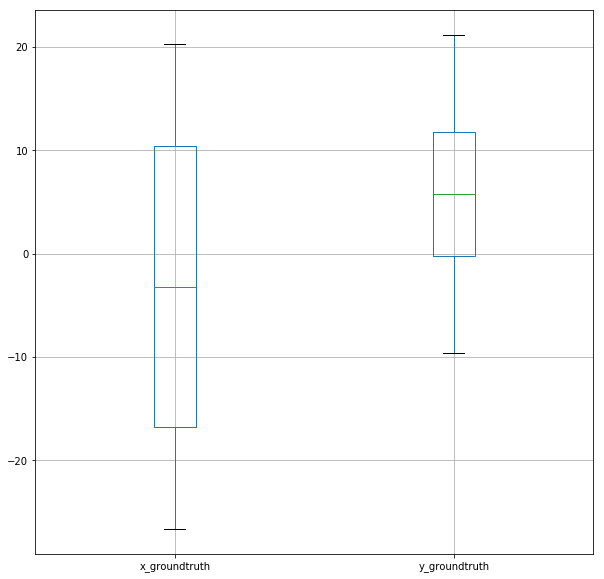

In [8]:
fig, ax = plt.subplots(figsize=(10,  10))
df.boxplot([df.columns[1],df.columns[2]], ax=ax)

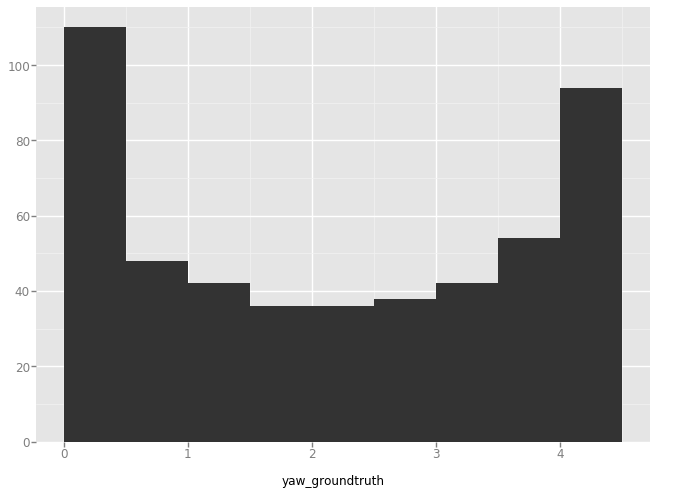

<ggplot: (-9223372036563085866)>

In [9]:
ggplot(df, aes(x='yaw_groundtruth')) + geom_histogram(binwidth = 0.5)

In [10]:
df.columns

Index(['timestamp', 'x_groundtruth', 'y_groundtruth', 'vx_groundtruth',
       'vy_groundtruth', 'yaw_groundtruth', 'yawrate_groundtruth'],
      dtype='object')

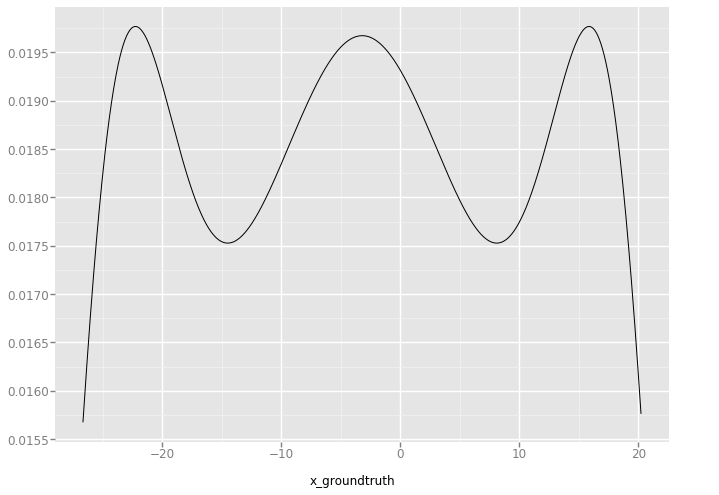

<ggplot: (-9223372036563086076)>

In [18]:
ggplot(df, aes(x=df.columns[1]))+ geom_density()

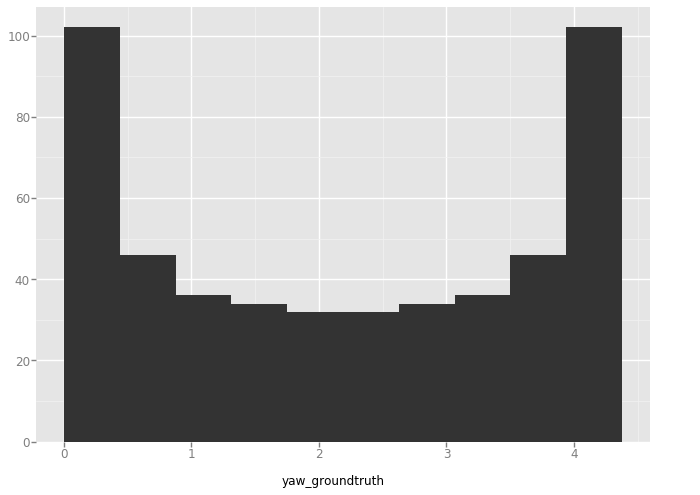

<ggplot: (-9223372036562795930)>

In [17]:
ggplot(df, aes(x='yaw_groundtruth')) + geom_histogram()